In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\Abdur rahim nishad\Downloads\heart failure.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


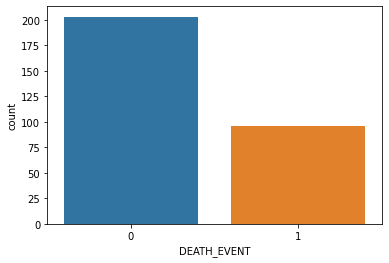

In [4]:
sns.countplot(df.DEATH_EVENT)
plt.show()

In [5]:
x=df.iloc[:,:-1]

In [6]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [7]:
y=df.iloc[:,-1]

In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=1)

# Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt=DecisionTreeClassifier()

In [13]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
pred=dt.predict(x_test)

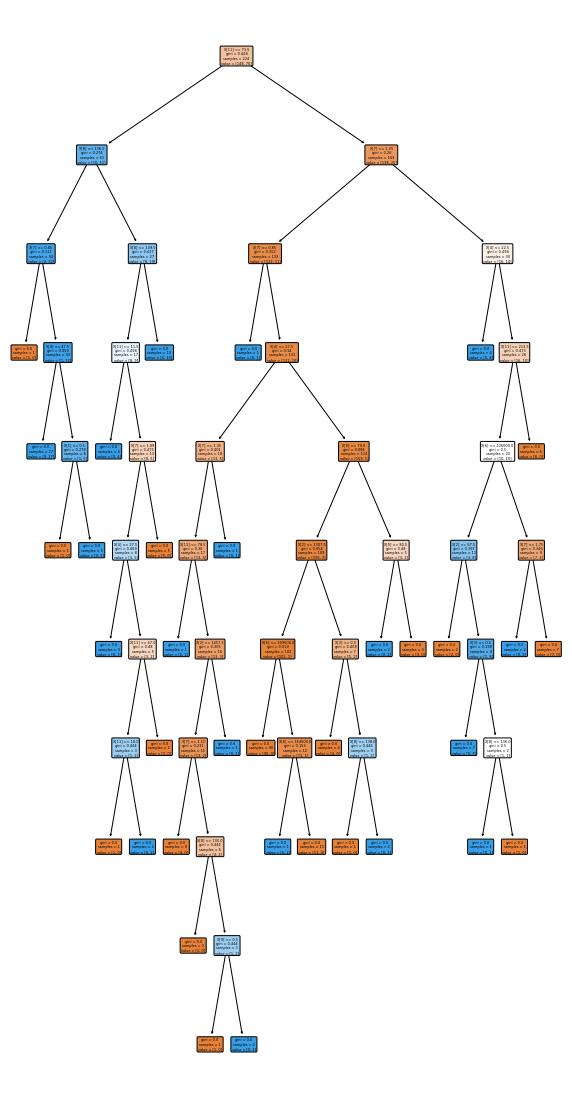

In [15]:
from sklearn import tree
plt.figure(figsize=(10,20))
tree.plot_tree(dt,filled=True,rounded=True)
plt.show()

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve

In [17]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.91      0.88        55\n           1       0.69      0.55      0.61        20\n\n    accuracy                           0.81        75\n   macro avg       0.77      0.73      0.74        75\nweighted avg       0.80      0.81      0.81        75\n'

In [18]:
accuracy_score(y_test,pred)

0.8133333333333334

In [19]:
cm=confusion_matrix(y_test,pred)

In [20]:
cm

array([[50,  5],
       [ 9, 11]], dtype=int64)

In [21]:
roc_curve(y_test,pred)

(array([0.        , 0.09090909, 1.        ]),
 array([0.  , 0.55, 1.  ]),
 array([2, 1, 0], dtype=int64))

<AxesSubplot:>

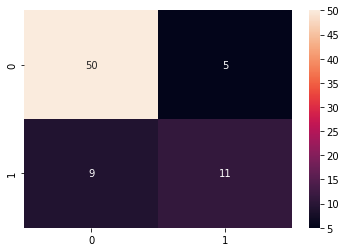

In [22]:
sns.heatmap(cm,annot=True)

In [23]:
from sklearn.metrics import plot_roc_curve

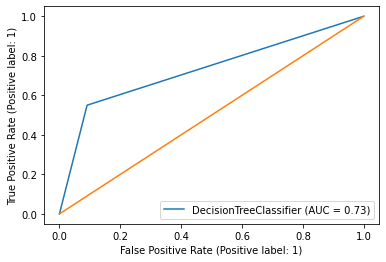

In [24]:
plot_roc_curve(dt,x_test,y_test)
plt.plot([0,1],[0,1])

# Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf=RandomForestClassifier(n_estimators=75)

In [27]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=75)

In [28]:
pred2=rf.predict(x_test)

In [29]:
pred2

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [30]:
accuracy=accuracy_score(y_test,pred2)

In [31]:
accuracy

0.8933333333333333

In [32]:
cm2=confusion_matrix(y_test,pred2)

In [33]:
cm2

array([[50,  5],
       [ 3, 17]], dtype=int64)

<AxesSubplot:>

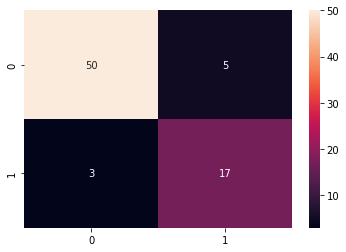

In [34]:
sns.heatmap(cm2,annot=True)

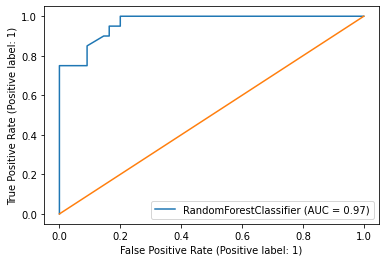

In [35]:
plot_roc_curve(rf,x_test,y_test)
plt.plot([0,1],[0,1])